In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Business Problem

* The dataset gives the details of customers in a bank. We are to predict if the customer exited the bank or not

* The dataset was getting from the link
    https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

In [9]:
# Reading in the dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preprocessing and Exploratory Data Analysis

In [10]:
# It's usually a wise decision to work with a copy of your dataset
df_copy = df.copy()

In [11]:
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Getting information on the dataset

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df_copy.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### As can be seen above, there are 10,000 entries in the dataset with some numerical and non-numerical columns. There are no missing values in the dataset

In [15]:
# Getting the categorical columns
df_copy.select_dtypes(include= ["object"]).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [16]:
df_copy.select_dtypes(include= ["int64", "float64"]).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [17]:
# Statistical summary of our dataset
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Let's encode the categorical data

In [18]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_copy[label] = pd.Categorical(content).codes

In [19]:
# the above can still be done using the pandas get_dummies function
# pd.get_dummies(data= df_copy, drop_first= True)

In [20]:
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### The RowNumber, CustomerId, Surname have no significance to the dataset so we have to drop the column

In [21]:
df_copy = df_copy.drop(columns= ["RowNumber", "CustomerId", "Surname"])
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Let's see if the dataset is balanced or not and count of those that exited or stayed
df_copy["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### 0- Exited, 1- Not Exited. The above shows an inbalanced dataset with approximated 4 times more the persons who stayed with the bank to those that exited

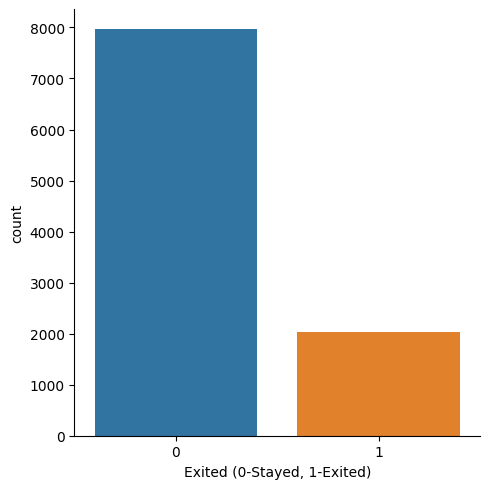

In [23]:
# Visualizing the above
sns.catplot(data= df_copy, x= "Exited", kind= "count")
plt.xlabel("Exited (0-Stayed, 1-Exited)");

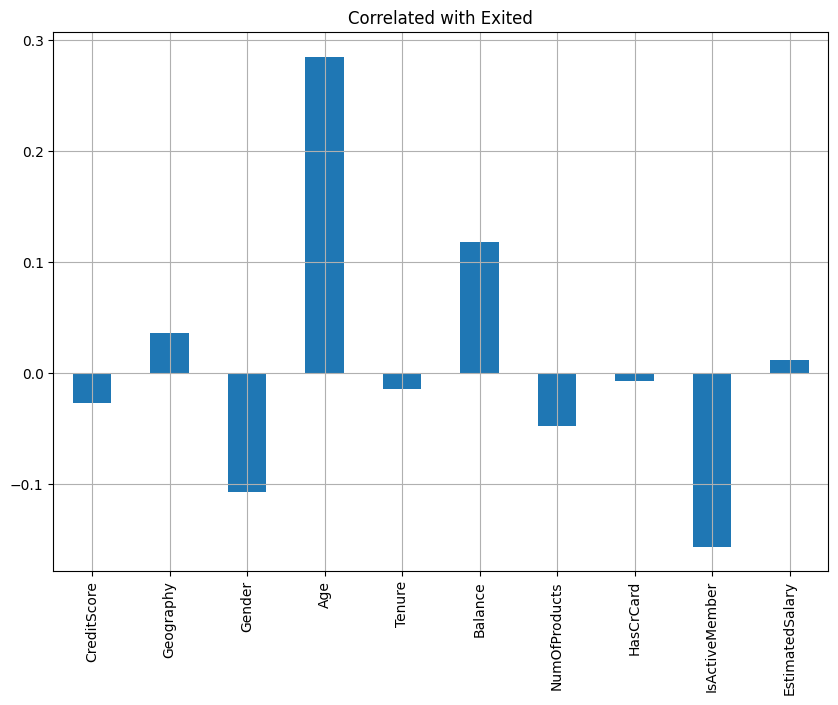

In [24]:
df_copy.drop(columns=["Exited"]).corrwith(df["Exited"]).plot.bar(figsize= (10, 7),
                                       title= "Correlated with Exited",
                                       grid= True);

### While Age have the highest positive correlation, IsActiveMember have the highest negative correlation to the target variable. Tenure , HasCrCard and EstimatedSalary arent so much correlated. Let's see the correlation with seaborn's heatmap

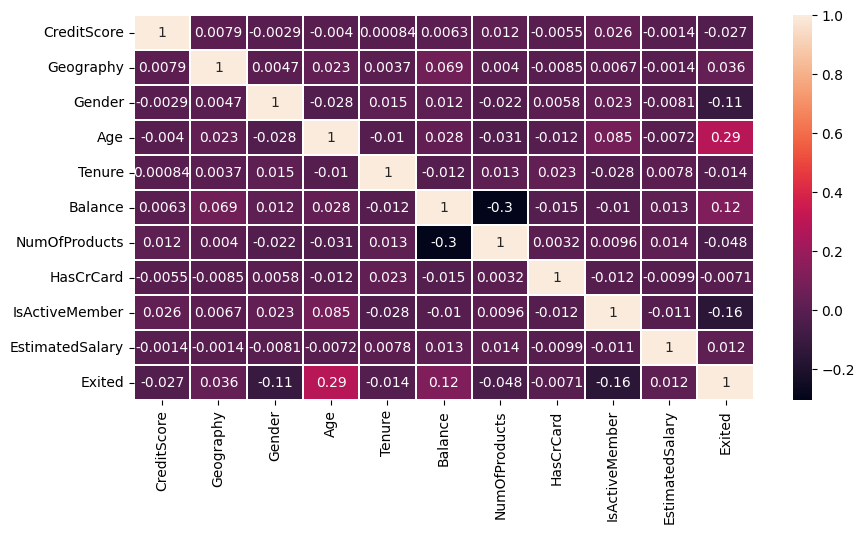

In [25]:
# Using heatmap to see the correlation
plt.figure(figsize= (10, 5))
sns.heatmap(df_copy.corr(), annot= True,
           linewidths=0.3);

### Spliting the dataset and performing some preprocessing before modeling

In [26]:
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [27]:
X = df_copy.drop("Exited", axis=1)
y = df_copy["Exited"]

X.shape, y.shape

((10000, 10), (10000,))

In [28]:
# conda install -c anaconda py-xgboost

In [29]:
# Importing some libraries for preprocessing and modeling
from sklearn.model_selection import (train_test_split,
                                    RandomizedSearchCV, 
                                     cross_val_score)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score,
                            confusion_matrix)

In [30]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

# Scaling our X_train and X_test
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [31]:
X_train

array([[ 0.16958176,  1.51919821, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.89294542,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.3131264 , -1.09168714, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [32]:
X_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

## Model Building 

In [33]:
# Logistic Regression Model
lr_model = LogisticRegression(n_jobs= -1, random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=0)

In [34]:
lr_y_preds = lr_model.predict(X_test)
lr_y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
def predictions(model, y_preds):
    
    y_preds = model.predict(X_test)
    
    score = {"accuracy_score": accuracy_score(y_test, y_preds),
            "precision": precision_score(y_test, y_preds),
            "recall_score": recall_score(y_test, y_preds),
            "f1_score": f1_score(y_test, y_preds),
            }
    
    return score

In [36]:
lr_result = predictions(lr_model, lr_y_preds)
lr_result

{'accuracy_score': 0.807,
 'precision': 0.576,
 'recall_score': 0.17777777777777778,
 'f1_score': 0.27169811320754716}

In [37]:
df_lr = pd.DataFrame(lr_result, index=["Logistic Regression"])
df_lr

,accuracy_score,precision,recall_score,f1_score
Logistic Regression,0.807,0.576,0.177778,0.271698


In [38]:
lr_confussion = confusion_matrix(y_test, lr_y_preds)
lr_confussion

array([[1542,   53],
       [ 333,   72]])

### The above result shows a fair value for the accuracy score and a horrible value for the rest. The confusion matrix shows the model have performed poorly and predicted 386 values wrongly

### Cross Validation of our model

In [39]:
def cross_val(model):
    
    accuracies = cross_val_score(estimator= model,
                                X= X_train, y= y_train,
                                cv= 10)
    
    result = {"accuracy mean": round(accuracies.mean()*100, 2),
             "accuracy std": round(accuracies.std()*100, 2)}
    
    return result

In [40]:
lr_crossval = cross_val(lr_model)

In [41]:
lr_crossval

{'accuracy mean': 80.89, 'accuracy std': 0.65}

In [42]:
lr_cv = pd.DataFrame(lr_crossval, index= ["lr_cv"])

In [43]:
lr_cv

,accuracy mean,accuracy std
lr_cv,80.89,0.65


### Let's compare the result with that of RandomForest

In [44]:
# Building our Random Forest Model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [45]:
rf_y_preds = rf_model.predict(X_test)

In [46]:
rf_result = predictions(rf_model, rf_y_preds)
rf_result

{'accuracy_score': 0.868,
 'precision': 0.7545126353790613,
 'recall_score': 0.5160493827160494,
 'f1_score': 0.6129032258064516}

In [47]:
rf_confusion = confusion_matrix(y_test, rf_y_preds)
rf_confusion

array([[1527,   68],
       [ 196,  209]])

In [48]:
df_rf = pd.DataFrame(rf_result, index=["Random Forest"])
df_rf

,accuracy_score,precision,recall_score,f1_score
Random Forest,0.868,0.754513,0.516049,0.612903


In [49]:
model_result = pd.concat([df_lr, df_rf])
model_result

,accuracy_score,precision,recall_score,f1_score
Logistic Regression,0.807,0.576000,0.177778,0.271698
Random Forest,0.868,0.754513,0.516049,0.612903


In [50]:
rf_crossval = cross_val(rf_model)
rf_crossval

{'accuracy mean': 85.98, 'accuracy std': 0.94}

In [51]:
rf_cv = pd.DataFrame(rf_crossval, index= ["rf_cv"])
rf_cv

,accuracy mean,accuracy std
rf_cv,85.98,0.94


In [52]:
cv_result = pd.concat([lr_cv, rf_cv])
cv_result

,accuracy mean,accuracy std
lr_cv,80.89,0.65
rf_cv,85.98,0.94


### It can be seen that our Random Forest, out of the box, have out performed our Logistic regression

In [53]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
xg_preds = xg_model.predict(X_test)

In [55]:
xg_result = predictions(xg_model, xg_preds)
xg_result

{'accuracy_score': 0.8515,
 'precision': 0.6788079470198676,
 'recall_score': 0.5061728395061729,
 'f1_score': 0.57991513437058}

In [56]:
df_xg = pd.DataFrame(xg_result, index= ["XGBoost"])
df_xg

,accuracy_score,precision,recall_score,f1_score
XGBoost,0.8515,0.678808,0.506173,0.579915


In [57]:
xg_confusion = confusion_matrix(y_test, xg_preds)
xg_confusion

array([[1498,   97],
       [ 200,  205]])

In [58]:
model_result = pd.concat([model_result, df_xg])
model_result

,accuracy_score,precision,recall_score,f1_score
Logistic Regression,0.8070,0.576000,0.177778,0.271698
Random Forest,0.8680,0.754513,0.516049,0.612903
XGBoost,0.8515,0.678808,0.506173,0.579915


In [59]:
xg_crossval = cross_val(xg_model)
xg_crossval

{'accuracy mean': 85.48, 'accuracy std': 1.5}

In [60]:
xg_cv = pd.DataFrame(xg_crossval, index= ["xg_cv"])

In [61]:
cv_result = pd.concat([cv_result, xg_cv])
cv_result

,accuracy mean,accuracy std
lr_cv,80.89,0.65
rf_cv,85.98,0.94
xg_cv,85.48,1.50


## It can be seen that Random Forest still did better than the three model. We are going to tune the hyperparameters for XGBoost for Learning purpose since I have done so for other model

# XGBoost Hyperparameter Tuning

In [62]:
parameters = {
    "learning_rate": np.arange(0.05, 0.4, 0.05),
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

In [63]:
rs_model = RandomizedSearchCV(estimator= xg_model,
                              param_distributions= parameters,
                              n_iter= 10,
                              scoring= "roc_auc",
                              n_jobs= -1,
                              cv= 10,
                              verbose= 3)

rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [64]:
rs_model.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [65]:
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
rs_model.best_score_

0.8610214137561961

# Getting The Final Model

In [71]:
final_model = XGBClassifier(
    min_child_weight= 7,
    max_depth= 3,
    learning_rate= 0.1,
    gamma= 0.3,
    colsample_bytree= 0.7
)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
y_preds = final_model.predict(X_test)

In [73]:
final_result = predictions(final_model, y_preds)
final_result

{'accuracy_score': 0.8645,
 'precision': 0.7518796992481203,
 'recall_score': 0.49382716049382713,
 'f1_score': 0.5961251862891207}

In [74]:
final_result = pd.DataFrame(final_result, index=["XGBoost_choosen"])
final_result

,accuracy_score,precision,recall_score,f1_score
XGBoost_choosen,0.8645,0.75188,0.493827,0.596125


In [75]:
model_result

,accuracy_score,precision,recall_score,f1_score
Logistic Regression,0.8070,0.576000,0.177778,0.271698
Random Forest,0.8680,0.754513,0.516049,0.612903
XGBoost,0.8515,0.678808,0.506173,0.579915


In [76]:
model_result = pd.concat([model_result, final_result])
model_result

,accuracy_score,precision,recall_score,f1_score
Logistic Regression,0.8070,0.576000,0.177778,0.271698
Random Forest,0.8680,0.754513,0.516049,0.612903
XGBoost,0.8515,0.678808,0.506173,0.579915
XGBoost_choosen,0.8645,0.751880,0.493827,0.596125


In [89]:
confusion_matrix(y_test, y_preds)

array([[1529,   66],
       [ 205,  200]])

## Training the model multiple times will give a better result